###**Import de librerías**

In [194]:
import math
import torch
import random
from matplotlib import cm
import scipy.stats as stats
import matplotlib.pyplot as plt

###**2- (30 puntos) Funciones multivariable**


####1. **El vector gradiente**:

Para cada una de las siguientes funciones multivariable: grafique su superficie, calcule el vector gradiente manualmente, evaluelo y grafique el vector unitario o de largo conveniente para su visualización, en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie). Finalmente calcule la magnitud de tal vector gradiente en cada punto.

#####**c) (5 puntos)** $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$, evaluación del gradiente en los puntos $P_{0}=\left(2,1\right)$ y $P_{1}=\left(5,7\right)$.

> Dada la función anterior, el gradiente de la primera función estaría dado por las siguientes derivadas parciales:

> $\nabla f\left(x,y\right)=\begin{cases}
\frac{\delta}{\delta x}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1= & 2e^{2x}+8x+2\\
\frac{\delta}{\delta y}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1= & 3e^{3y}+10y
\end{cases}$

In [9]:
def funcion_c(x, y):
  return (4*x**2)+(2*x)+(math.e**(2*x))+(5*(y**2))+(math.e**(3*y))+1

def derivada_funcion_c_1(x):
  return (2*(math.e**(2*x)))+(8*x)+2

def derivada_funcion_c_2(x):
  return (3*(math.e**(3*x)))+(10*x)

> Al evaluar ambos puntos, siendo estos $P_{0}=\left(2,1\right)$ y $P_{1}=\left(5,7\right)$, se obtienen los siguientes resultados:

In [10]:
gradiente_punto_0 = torch.tensor([derivada_funcion_c_1(2), derivada_funcion_c_2(1), 0])
print("Gradiente evaluado en P0: ", gradiente_punto_0)
print("Magnitud del gradiente evaluado en P0: ", torch.norm(gradiente_punto_0), "\n")

gradiente_punto_1 = torch.tensor([derivada_funcion_c_1(5), derivada_funcion_c_2(7), 0])
print("Gradiente evaluado en P1: ", gradiente_punto_1)
print("Magnitud del gradiente evaluado en P1: ", torch.norm(gradiente_punto_1))

Gradiente evaluado en P0:  tensor([127.1963,  70.2566,   0.0000])
Magnitud del gradiente evaluado en P0:  tensor(145.3096) 

Gradiente evaluado en P1:  tensor([4.4095e+04, 3.9564e+09, 0.0000e+00])
Magnitud del gradiente evaluado en P1:  tensor(3.9564e+09)


> A continuación se presenta el gráfico respectivo: la superficie abarcada por la función en la maya de coordenadas junto con los dos vectores resultantes de la evaluación de cada uno de los dos puntos especificados en el vector gradiente obtenido de las derivadas parciales anteriormente calculadas:

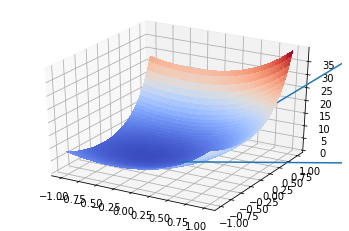

In [11]:
def evaluar_grandiente(inicio, arrange):
    xs = torch.linspace(arrange[0], arrange[1], steps=256)  # x1
    ys = torch.linspace(arrange[0], arrange[1], steps=256)  # x2
    x, y = torch.meshgrid(xs, ys, indexing='xy')

    #  Se presentan los vectores y la superficie de la función en el resultado
    ax = plt.axes(projection='3d')
    ax.quiver(inicio[0], inicio[1], inicio[2], gradiente_punto_0[0], gradiente_punto_0[1], gradiente_punto_0[2])
    ax.quiver(inicio[0], inicio[1], inicio[2], gradiente_punto_1[0], gradiente_punto_1[1], gradiente_punto_1[2])
    ax.plot_surface(x.numpy(), y.numpy(), funcion_c(x, y).numpy(), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

evaluar_grandiente([0, 0, 0], [-1, 1])

####2. **(10 puntos)** En general, investigue ¿qué es y que indica la matriz Hessiana?

> Sobre las aplicaciones de esta matriz, se pueden citar los siguientes puntos:

* Permite encontrar ya sea máximos o mínimos de funciones multivariable. Para conseguir esto, el procedimiento a seguir consiste de obtener los puntos críticos de la función (igualando a cero el vector gradiente y obteniendo los puntos respectivos del despeje) y operarlos con la matriz Hessiana.

> Una vez obtenido el resultado, la matriz que se consiguió debe ser evaluada bajo el criterio de: definida positiva, definida negativa, indefinida, etc (lo cual puede ser establecido con el Criterio de los valores propios o con el Criterio de Sylvester).

> Dependiendo del tipo de matriz obtenida, así podrá definirse el punto que fue utilizado para el cálculo (máximo, mínimo o un punto neutro).


* También permite saber si una función es cóncava o convexa con respecto a un conjunto de puntos pertenecientes a la función, aplicando nuevamente el concepto de definida positiva, definida negativa, indefinida, etc.

Fuentes utilizadas para cálculo y usos:
* [Matriz Hessiana (o Hessiano)](https://www.matricesydeterminantes.com/matrices/matriz-hessiana-hessiano-2x2-3x3/)
* [La matriz hessiana](https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian)

#####**c) (5 puntos)** $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$

La matriz Hessiana para este ejercicio está dada por las siguiente derivadas de segundo orden:

* $f_{xx}\left(x,y\right)=\frac{\delta}{\delta x}\left(2e^{2x}+8x+2\right)=4e^{2x}+10$

* $f_{xy}\left(x,y\right)=\frac{\delta}{\delta y}\left(2e^{2x}+8x+2\right)=0$

* $f_{yx}\left(x,y\right)=\frac{\delta}{\delta x}\left(3e^{3y}+10y\right)=0$

* $f_{yy}\left(x,y\right)=\frac{\delta}{\delta y}\left(3e^{3y}+10y\right)=9e^{3y}+10$

> Esto, organizado en lo que llamaríamos la matriz Hessiana, resulta en la siguiente matriz:

> $\mathbf{H}f\left(x,y\right)=\left[\begin{array}{cc}
f_{xx}\left(x,y\right) & f_{yx}\left(x,y\right)\\
f_{xy}\left(x,y\right) & f_{yy}\left(x,y\right)
\end{array}\right]=\left[\begin{array}{cc}
4e^{2x}+10 & 0\\
0 & 9e^{3y}+10
\end{array}\right]$

Al evaluar esta matriz con los valores de los dos puntos respectivos, se obtienen las siguientes matrices:

1. Para el punto $P_{0}=\left(2,1\right)$, la matriz resultante está dada por:

> $=\left[\begin{array}{cc}
4e^{4}+10 & 0\\
0 & 9e^{3}+10
\end{array}\right]$

2. Para el punto $P_{0}=\left(5,7\right)$, la matriz resultante está dada por:

> $=\left[\begin{array}{cc}
4e^{10}+10 & 0\\
0 & 9e^{21}+10
\end{array}\right]$

###**3- (50 puntos) Probabilidades: Algoritmo de Maximización de la Esperanza**

A continuación, implemente el algoritmo de maximización de la esperanza (descrito en el material del curso), usando la definición y descripción de las siguientes funciones como base:

####1. **(5 puntos)** Función ***generate_data***:

Implemente la función *generate_data* la cual reciba la cantidad de observaciones unidimensionales total a generar $N$, y los parámetros correspondientes a $K=2$ funciones de densidad Gaussianas. Genere los datos siguiendo tales distribuciones, y retorne tal matriz de datos $X\in\mathbb{R}^{N}$.

* Grafique los datos usando un *scatter plot* junto con las gráficas de la función de densidad de probabilidad, en la misma figura (gráfico).

In [323]:
def get_color(i):
  colors = "rbgcmykw"
  return colors[i % len(colors)]

class Random_Data_Generator:
  def __init__(self, total_samples:int, total_distributions:int, offset:int, expected_sigma_range:set):
    self.offset = offset
    self.total_samples = total_samples
    self.total_distributions = total_distributions
    self.expected_sigma_range = expected_sigma_range
    self.set_default_to_variables()
  
  def set_default_to_variables(self):
    self.curr_offset = 0
    self.generated_output = torch.tensor([])
    self.real_parameters = torch.zeros(self.total_distributions, 2)
    self.samples_per_tensor = self.total_samples // self.total_distributions
  
  def generate_data(self):
    self.y = torch.zeros(self.samples_per_tensor)
    output = torch.stack(self.generate_data_aux(self.samples_per_tensor))
    self.generated_output = output.view(*output.shape[:0], -1, *output.shape[self.total_distributions:])
  
  def generate_data_aux(self, n_aux:int, curr_dist:int=0):
    sig_const = self.expected_sigma_range
    st = self.real_parameters[curr_dist][1] = random.randint(sig_const[0], sig_const[1])
    mu = self.real_parameters[curr_dist][0] = self.curr_offset + self.offset - st
    
    x = torch.normal(mean=mu, std=st, size=(1, n_aux))[0]
    xcord = torch.linspace(torch.min(x) - st, torch.max(x) + st, 100)
    
    plt.plot(xcord, stats.norm.pdf(xcord, mu, st))
    plt.scatter(x, self.y, c = get_color(curr_dist))
    res_aux = [x]

    if curr_dist + 1 < self.total_distributions:
      new_k = curr_dist + 1
      self.curr_offset = self.curr_offset + self.offset
      new_data = self.generate_data_aux(n_aux, new_k)
      res_aux.extend(new_data)
    
    return res_aux

--> La matriz K =  2 tiene las siguientes muestras: 
 tensor([ 84.5857,  83.5873,  63.0666, 107.4922,  89.1362,  65.5418,  73.5512,
         50.0076, 108.1133,  90.5325, 118.9127,  83.0328,  95.2991,  49.0087,
         68.5641,  70.9093,  60.1742, 108.0247,  50.8358,  83.8428,  26.5412,
         79.8729,  73.6482,  96.8771,  75.7554,  83.4366,  70.8377,  80.2118,
         62.5272,  74.3400,  51.3767, 103.0857,  86.9871, 107.2020, 119.0687,
         40.0695,  93.1550, 121.4835,  91.0607,  69.8930,  84.0217,  78.2061,
         81.2689,  58.5065, 112.5520,  97.4059,  96.7700,  92.2188,  85.3769,
         80.1714, 214.7469, 185.0915, 184.9984, 183.5539, 206.5923, 180.3115,
        185.7505, 181.3452, 172.9384, 174.6109, 169.9350, 193.2048, 169.9612,
        215.9236, 201.1938, 177.9794, 162.0985, 207.9254, 177.2962, 159.0701,
        196.3406, 208.1045, 187.3262, 192.4387, 201.7889, 184.1960, 192.5028,
        167.8289, 181.6864, 200.5700, 173.4283, 171.3294, 182.6675, 186.8152,
        17

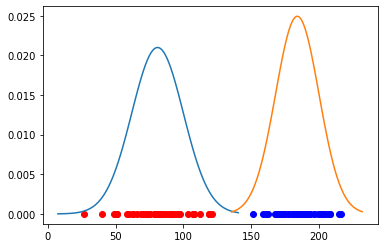

In [359]:
generator = Random_Data_Generator(100, 2, 100, (10, 30))
generator.generate_data()

print('--> La matriz K = ', generator.total_distributions, 'tiene las siguientes '
      'muestras: \n', generator.generated_output, '\n')

print('--> Adicionalmente, los parámetros generados para dichas dimensiones son: ',
      '\n ', generator.real_parameters)

####2. **(5 puntos)** Función ***init_random_parameters***:

Implemente la función init_random_parameters la cual genere una matriz de $P\in\mathbb{R}^{K\times2}$ dimensiones, con los parámetros de las funciones de densidad Gaussiana generados completamente al azar.

* Muestre un pantallazo donde verifique su funcionamiento correcto con los comentarios asociados.

In [358]:
def init_random_parameters(k):
  return torch.randint(0, generator.curr_offset + generator.offset, (2,k))

curr_parameters = init_random_parameters(generator.total_distributions)
print('--> Parámetros aleatorios calculados para el inicio del algoritmo: \n',
      curr_parameters)

--> Parámetros aleatorios calculados para el inicio del algoritmo: 
 tensor([[ 18, 187],
        [160,  70]])


> El objetivo con esta función es calcular la matriz de parámetros de la forma más sencilla y directa posible. Para lograr esto, los únicos límites aplicados para la definición del *aleatorio* es el siguiente rango permitido para calcular los valores aleatorios que estarán en la matriz de salida:

> $[0, curr\_offset + offset]$

> Este rango viene definido enteramente desde la función anterior de *generate_data* donde:

* El límite inferior 0 corresponde con el valor inicial que tiene la variable $curr\_offset$ establecido por defecto en la clase generadora de datos aleatorios.
* El límite superior $curr\_offset + offset$ corresponde a un $offset$ que es definido antes de ejecutar la función de *generate_data* y a un $curr\_offset$ que va incrementando $offset$ con cada dimensión de data que se agrega al dataset final de pruebas.

> De esta forma, se garantiza que los valores aleatorios vayan a caer en un rango de valores que no sea el máximo requerido al momento de generar la muestra. Esto evita valores que se alejen mucho por número muy pequeños o muy grandes.

> Sin embargo, este rango no evita que se caiga en sitios muy aislados de las *islas* generadas por los K grupos de datos, de forma que es muy mejorable para el punto final de esta pregunta.